In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("importation finie.")

importation finie.


In [95]:
df = pd.read_csv("predictive_maintenance.csv")

data = df.to_numpy()


Compréhension de données

In [96]:
df.head()

,uID,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [98]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uID                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [99]:
df.describe()

,uID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<ipython-input-100-9c32afec99ad>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(ax = ax)


array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>, <AxesSubplot:>]],
      dtype=object)

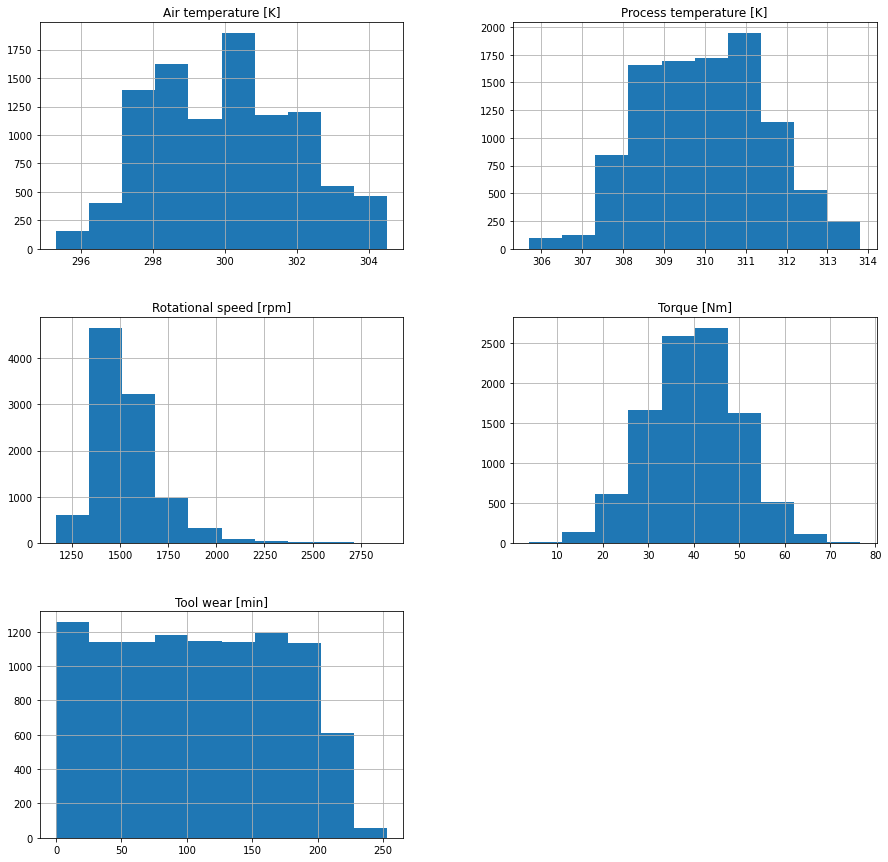

In [100]:
# distribution des valuers

fig = plt.figure(figsize = (15,15))
ax  = fig.gca()

df.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(ax = ax)

In [101]:
# regarder la distribution des Failure Type

FailureType, ftCount = np.unique(data[:,len(data[0])-1] , return_counts=True)

for i in zip(FailureType, ftCount):
    print(i)




('Heat Dissipation Failure', 112)
('No Failure', 9652)
('Overstrain Failure', 78)
('Power Failure', 95)
('Random Failures', 18)
('Tool Wear Failure', 45)


In [102]:
# créer un tableau pour avoir une classe binaire avec No Failure et Failure
binaryData = []
for i in data:
    tmp = list(i)
    if i[len(i)-1] != 'No Failure':
        tmp.append('Failure')
    else:
        tmp.append('No Failure')
    binaryData.append(tmp)

colBinaryData = [k for k in df.keys()]
colBinaryData.append('BinClass')

print(colBinaryData)
df_binaryClass = pd.DataFrame(binaryData, 
                columns = colBinaryData
            )



['uID', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type', 'BinClass']


In [108]:

#encoder les valeurs catégorielles
le = LabelEncoder()
df_binaryClass['Failure Type'] = le.fit_transform(df_binaryClass.loc[:,["Failure Type"]].values)
df_binaryClass['BinClass'] = le.fit_transform(df_binaryClass.loc[:,["BinClass"]].values)




#ne garder que les données numériques
df_binaryClass = df_binaryClass.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]', 'Failure Type', 'BinClass']]

# ne récupérer que les variables numériques
X  = df_binaryClass.iloc[:, :-2].values
y  = df_binaryClass.loc[:,['BinClass']].values

# echantillonnage 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Normaliser les données train et test
scaler       = StandardScaler()
X_train_sc   = scaler.fit_transform(X_train)                 
X_test_sc    = scaler.transform(X_test)                     

# Choix du modèl
svc = SVC()

svc.fit(X_train, y_train)

print("Output Training Accuracy: ", svc.score(X_train, y_train)*100, "%")

# appliquer un modèle
y_pred   = svc.predict(X_test)

def getScore(y_test, y_pred, val):
    if val == 'BinClass':
        c = 1
    else:
        c = 0
    print(c, "Test Accuracy (",val,")       : ",accuracy_score(y_test, y_pred)*100,"%")
    print("Test Precision (",val,")      : ",precision_score(y_test, y_pred)*100,"%")
    print("Test Recall (",val,")         : ",recall_score(y_test, y_pred)*100,"%")
    print("Test Accuracy (",val,") : ",accuracy_score(y_test, y_pred)*100,"%")

# Performance du modèle
print()
getScore(y_test, y_pred, 'BinClassq')



/home/headwork70/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/headwork70/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Output Training Accuracy:  96.74285714285715 %

0 Test Accuracy ( BinClassq )       :  96.0 %
Test Precision ( BinClassq )      :  96.0 %
Test Recall ( BinClassq )         :  100.0 %
Test Accuracy ( BinClassq ) :  96.0 %
